#Project title: Laptop Price Prediction for SmartTech Co.

###Install necessary libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

###Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Read the file

In [3]:
laptop=pd.read_csv("laptop.csv")

###Data Exploration and Understanding

In [4]:
laptop.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
laptop.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
laptop.info()# 13 columns, 10-categorical, 3 numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
laptop.shape

(1303, 13)

In [8]:
laptop.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


In [9]:
laptop.describe()# max: RS.3,24,954.72, min:RS.9,270.72

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [10]:
laptop.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [87]:
laptop.duplicated().sum()

np.int64(0)

##Data Visualization

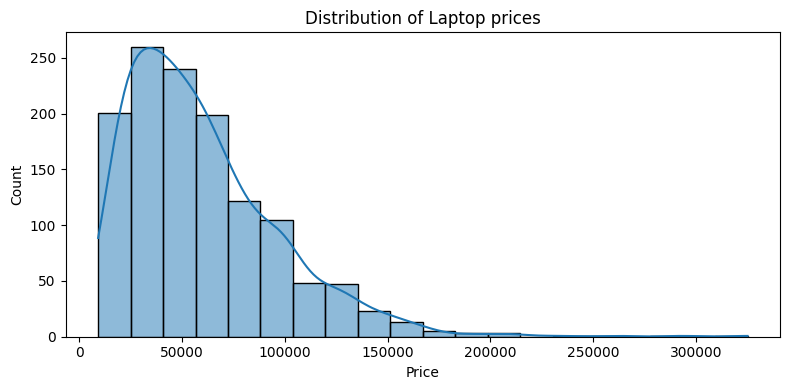

In [11]:
#1.Distibution of Laptop Price

plt.figure(figsize=(8,4))
sns.histplot(laptop['Price'],bins=20,kde=True)
plt.title("Distribution of Laptop prices")
plt.tight_layout()
plt.show()

##Prices are right-skewed.
#Most laptops fall within a moderate price range, with fewer high-end models.

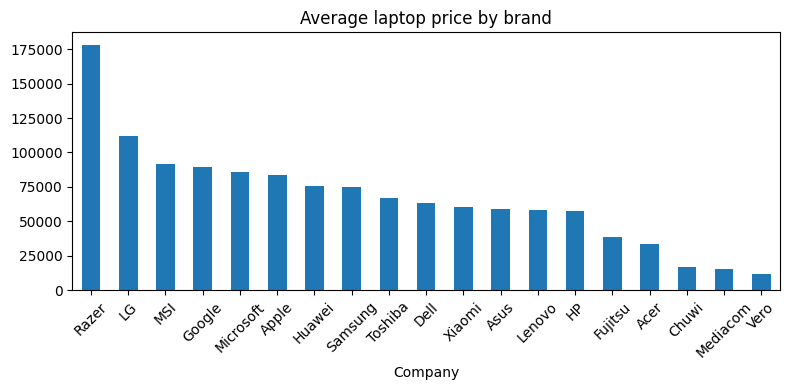

In [12]:
#2.Average Laptop price by Company

plt.figure(figsize=(8,4))
average_laptop_price_by_brand=laptop.groupby('Company')['Price'].mean().sort_values(ascending=False)
average_laptop_price_by_brand.plot(kind='bar')
plt.title("Average laptop price by brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Razer and LG have the highest average prices.

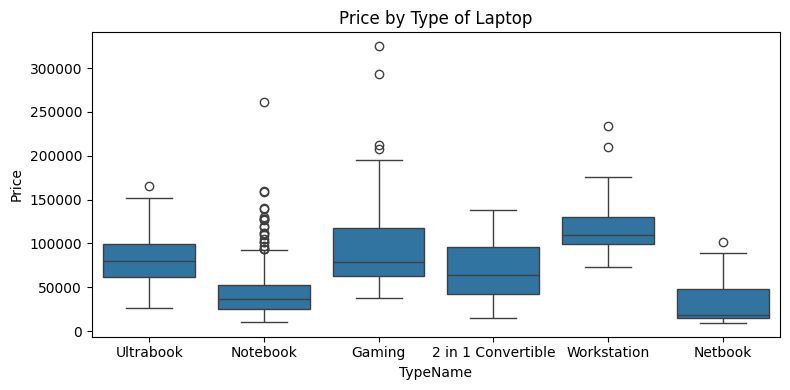

In [13]:
#3.Price by type of laptop

plt.figure(figsize=(8,4))
sns.boxplot(data=laptop,x='TypeName', y='Price')
plt.title('Price by Type of Laptop')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Workstation and Gaming laptops are priced the highest.

##Data Preprocessing

###Handling of Duplicates: No Duplicate values are present in laptop dataset

###Handling of Null Values:

In [14]:
#to remove null values:

laptop_clean=laptop.dropna()

In [15]:
laptop_clean.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [16]:
laptop_clean.shape  #30 Rows were dropped

(1273, 13)

In [17]:
#Top 5 Brands and types by Average price:

Top_Brand= laptop_clean.groupby('Company')['Price'].mean().sort_values(ascending=False)
Top_TypeName=laptop_clean.groupby('TypeName')['Price'].mean().sort_values(ascending=False)

print("Top 5 Most Expensive Brands:")
print(Top_Brand.head(5))
print("\nAverage Price by Laptop Type:")
print(Top_TypeName.head(5))

Top 5 Most Expensive Brands:
Company
Razer        178282.491429
LG           111834.720000
MSI           91814.548891
Google        89386.080000
Microsoft     85903.788000
Name: Price, dtype: float64

Average Price by Laptop Type:
TypeName
Workstation           121497.525683
Gaming                 92204.328662
Ultrabook              82926.038073
2 in 1 Convertible     68186.738110
Notebook               41545.173052
Name: Price, dtype: float64


###Handling of ouliers

In [18]:
High_Price= laptop_clean['Price'].quantile(0.99)
Low_Price=laptop_clean['Price'].quantile(0.01)
laptop_clean_outliers=laptop_clean[(laptop_clean['Price'] < High_Price) & (laptop_clean['Price']>Low_Price)]

In [19]:
laptop_clean_outliers.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [20]:
##Ensure the dataset is ready for model training.

laptop_clean_outliers.shape #28 rows were dropped


(1245, 13)

In [21]:
laptop_clean_outliers.describe() #Max: 1,67,778.72, min:12,733.92

,Unnamed: 0.1,Unnamed: 0,Price
count,1245.000000,1245.000000,1245.000000
mean,647.871486,647.871486,58894.922001
std,374.678764,374.678764,33353.686309
min,0.000000,0.000000,12733.920000
25%,325.000000,325.000000,32660.640000
50%,645.000000,645.000000,52161.120000
75%,972.000000,972.000000,78647.140800
max,1302.000000,1302.000000,167778.720000


In [22]:
print("Before:", laptop.shape[0])
print("After :", laptop_clean_outliers.shape[0])
print("Rows dropped:", laptop.shape[0] - laptop_clean_outliers.shape[0])

Before: 1303
After : 1245
Rows dropped: 58


#Feature Engineering

In [23]:
# RAM: "8GB" → 8

laptop_clean_outliers.loc[:,'Ram']= laptop_clean_outliers['Ram'].str.replace('GB','').astype(int)


In [24]:
#Remove 'kg' and convert everything to string,
#Replace invalid entries like '?' with NaN
#Fill missing values with median

laptop_clean_outliers.loc[:, 'Weight'] = laptop_clean_outliers['Weight'].replace('?', np.nan).str.replace('kg', '', regex=False).astype(float).fillna(
    laptop_clean_outliers['Weight'].replace('?', np.nan).str.replace('kg', '', regex=False).astype(float).median()
)

In [25]:
##Replace invalid entries like '?' with NaN
#Fill missing values with median


laptop_clean_outliers.loc[:, 'Inches'] = laptop_clean_outliers['Inches'].replace('?', np.nan).astype(float).fillna(
    laptop_clean_outliers['Inches'].replace('?', np.nan).astype(float).median()
)

In [27]:
## Touchscreen

laptop_clean_outliers.loc[:,'Touchscreen']=laptop_clean_outliers['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in str(x) else 0)

In [29]:
laptop_clean_outliers.loc[:,'HAS_SSD']=laptop_clean_outliers['Memory'].apply(lambda x: 1 if 'SSD' in str(x) else 0)
laptop_clean_outliers.loc[:,'HAS_HDD']=laptop_clean_outliers['Memory'].apply(lambda x: 1 if 'HDD' in str(x) else 0)
laptop_clean_outliers.loc[:,'Has_FlashStorage'] = laptop_clean_outliers['Memory'].apply(lambda x: 1 if 'Flash Storage' in str(x) else 0)
laptop_clean_outliers.loc[:,'Has_Hybrid'] = laptop_clean_outliers['Memory'].apply(lambda x: 1 if 'Hybrid' in str(x) else 0)

In [31]:
## CPU Brand

laptop_clean_outliers.loc[:,'CPU_Brand']=laptop_clean_outliers['Cpu'].apply(lambda x: 'Intel i7' if 'i7' in str(x) else ('Intel i5' if 'i5' in str(x) else 'other'))

In [33]:
## GPU Brand
#laptop_clean_outliers = laptop_clean[laptop_clean['Price'] > 100000].copy()
laptop_clean_outliers.loc[:,'GPU_Brand']=laptop_clean_outliers['TypeName'].apply(lambda x:  x.split()[0] )

In [36]:
## Brand

laptop_clean_outliers.loc[:,'Brand'] = laptop_clean_outliers['Company'].apply(lambda x: x.split()[0])

In [37]:
laptop_final_column= laptop_clean_outliers.drop(columns=['Company','ScreenResolution','Cpu','Gpu','Memory']) #Remove unwanted columns

In [38]:
laptop_final_column.head()

,Unnamed: 0.1,Unnamed: 0,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,HAS_SSD,HAS_HDD,Has_FlashStorage,Has_Hybrid,CPU_Brand,GPU_Brand,Brand
0,0,0.0,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,0,0,0,Intel i5,Ultrabook,Apple
1,1,1.0,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,0,1,0,Intel i5,Ultrabook,Apple
2,2,2.0,Notebook,15.6,8,No OS,1.86,30636.0000,0,1,0,0,0,Intel i5,Notebook,HP
3,3,3.0,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,0,0,0,Intel i7,Ultrabook,Apple
4,4,4.0,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,0,0,0,Intel i5,Ultrabook,Apple


In [39]:
laptop_final_column.shape

(1245, 16)

####Encode categorical variables

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [43]:
#Encode numerical column to categorical column:


label_columns=['TypeName','OpSys','CPU_Brand','GPU_Brand','Brand']
le=LabelEncoder()
for col in label_columns:
  laptop_final_column[col]= le.fit_transform(laptop_final_column[col])

#Model Development

In [44]:
features=['Ram','Weight','Touchscreen', 'HAS_SSD', 'CPU_Brand', 'GPU_Brand', 'Brand','Inches']# exclude price since it is target value
target=['Price']

In [45]:
X=laptop_final_column[features]
y=laptop_final_column[target]

In [46]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)


Linear Regression
MAE : Rs.16238.03
MSE : 572953904.46
RMSE: Rs.23936.46
R2  : 0.500

Top Coefficients for Linear Regression:
       Feature   Coefficient
3      HAS_SSD  12751.890746
2  Touchscreen   7356.854372
4    CPU_Brand  -6690.730396
0          Ram   4100.522974
5    GPU_Brand   1405.738664
6        Brand    618.671588
1       Weight    503.409837
7       Inches     92.178719


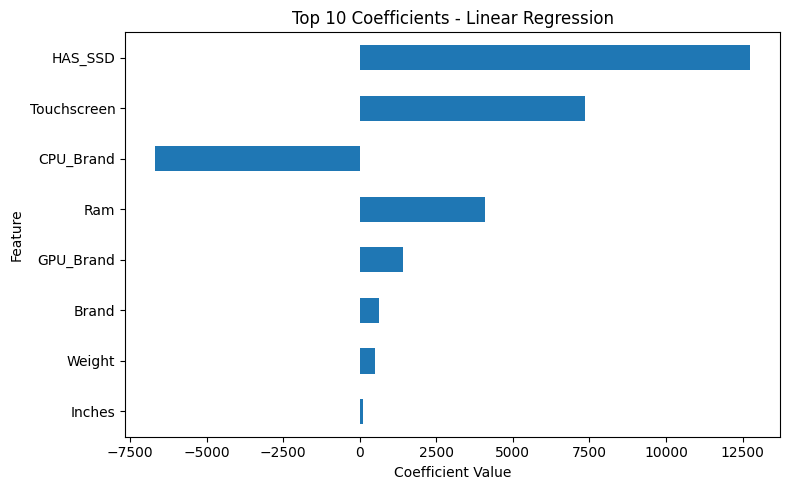


Random Forest
MAE : Rs.13054.10
MSE : 375754289.71
RMSE: Rs.19384.38
R2  : 0.672

Top Coefficients for Random Forest:
       Feature   Coefficient
3      HAS_SSD  12751.890746
2  Touchscreen   7356.854372
4    CPU_Brand  -6690.730396
0          Ram   4100.522974
5    GPU_Brand   1405.738664
6        Brand    618.671588
1       Weight    503.409837
7       Inches     92.178719


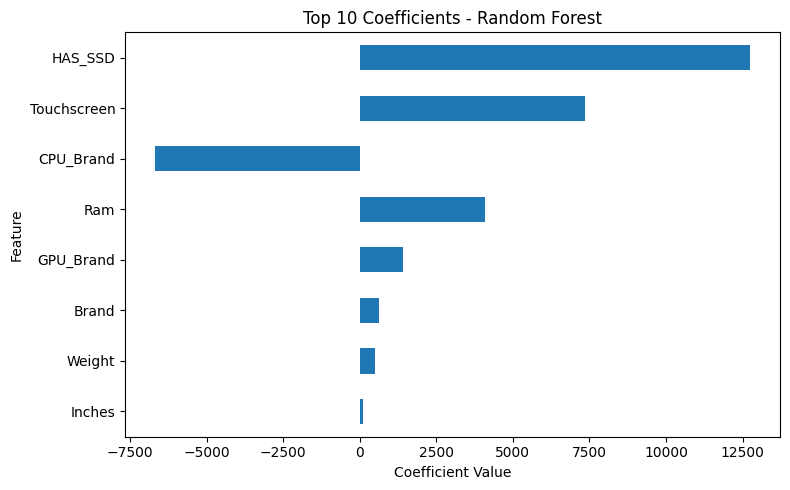


Feature Importances for Random Forest:
       Feature  Importance
0          Ram    0.396564
4    CPU_Brand    0.220733
1       Weight    0.161101
5    GPU_Brand    0.101951
6        Brand    0.053913
7       Inches    0.041496
3      HAS_SSD    0.016938
2  Touchscreen    0.007304


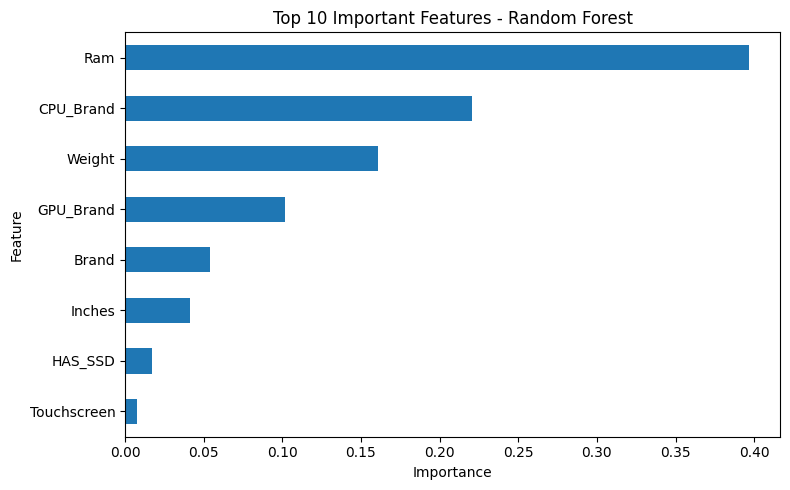


Gradient Boosting
MAE : Rs.13442.47
MSE : 384379056.23
RMSE: Rs.19605.59
R2  : 0.664

Top Coefficients for Gradient Boosting:
       Feature   Coefficient
3      HAS_SSD  12751.890746
2  Touchscreen   7356.854372
4    CPU_Brand  -6690.730396
0          Ram   4100.522974
5    GPU_Brand   1405.738664
6        Brand    618.671588
1       Weight    503.409837
7       Inches     92.178719


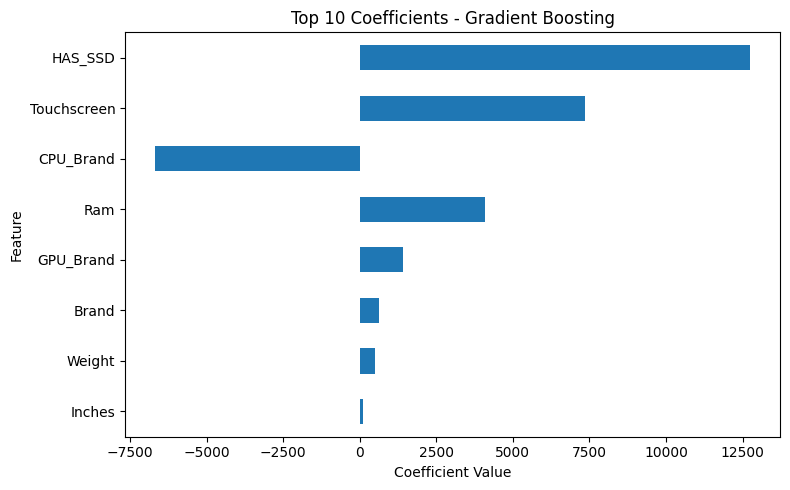


Feature Importances for Gradient Boosting:
       Feature  Importance
0          Ram    0.423190
4    CPU_Brand    0.197294
1       Weight    0.147422
5    GPU_Brand    0.103836
3      HAS_SSD    0.052136
6        Brand    0.040576
7       Inches    0.030410
2  Touchscreen    0.005135


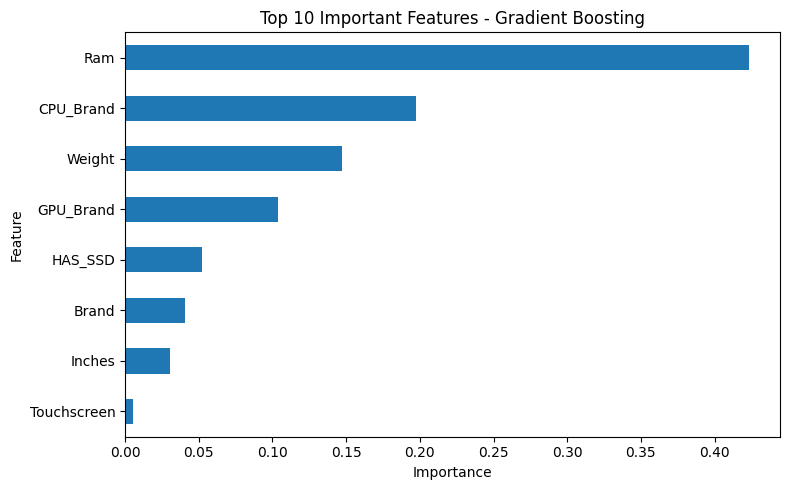


Ridge
MAE : Rs.16246.48
MSE : 574678852.09
RMSE: Rs.23972.46
R2  : 0.498

Top Coefficients for Ridge:
       Feature   Coefficient
3      HAS_SSD  12471.193457
2  Touchscreen   6982.095518
4    CPU_Brand  -6679.615409
0          Ram   4118.474743
5    GPU_Brand   1351.889328
6        Brand    621.383231
1       Weight    400.555585
7       Inches     88.254511


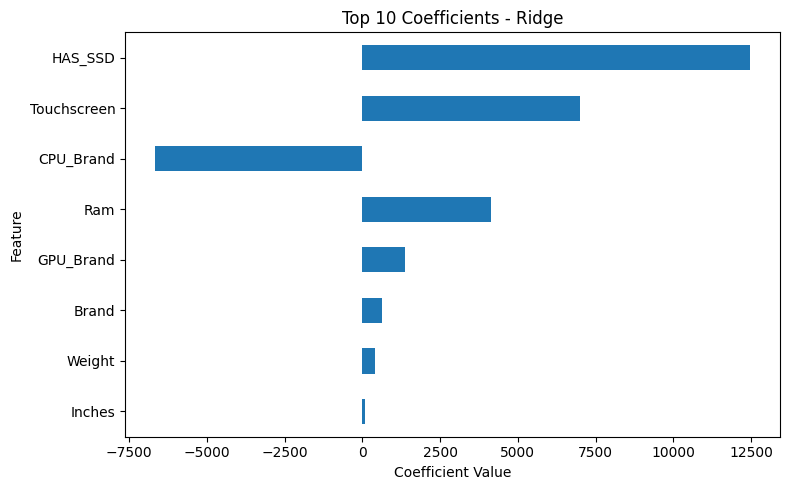


Lasso
MAE : Rs.16238.20
MSE : 573005732.18
RMSE: Rs.23937.54
R2  : 0.500

Top Coefficients for Lasso:
       Feature   Coefficient
3      HAS_SSD  12745.707563
2  Touchscreen   7340.297077
4    CPU_Brand  -6689.958880
0          Ram   4101.064762
5    GPU_Brand   1402.568924
6        Brand    618.538437
1       Weight    497.272199
7       Inches     92.242146


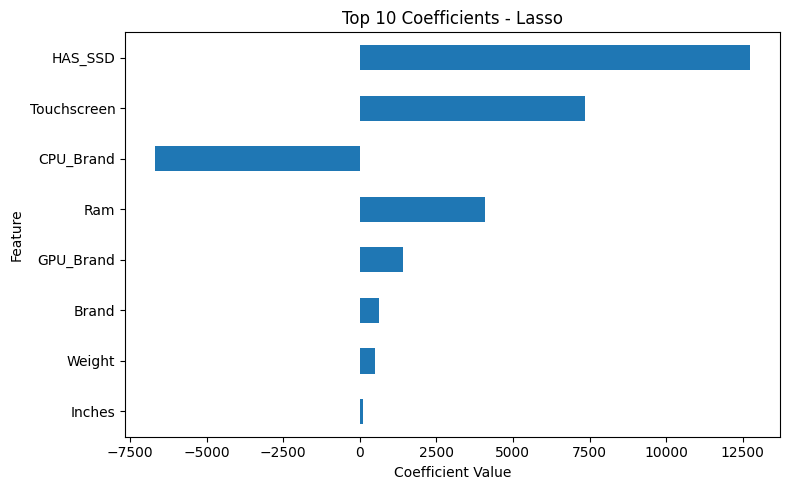

In [50]:
# Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Ensure y is 1D, ravel returns flattened 1d darray
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train) # Train the model
    preds = model.predict(X_test) # Predict on test set

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 3)
    })

    print(f"\n{name}")
    print(f"MAE : Rs.{mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: Rs.{rmse:.2f}")
    print(f"R2  : {r2:.3f}")

    if name in ['Linear Regression', 'Ridge', 'Lasso']:
      coef_df = pd.DataFrame({
        'Feature': X_train.columns, # Feature names
        'Coefficient': model.coef_   #Corresponding coefficients,(trailing underscore _ model learns during training).
    })

    # Sort by absolute coefficient values
    top_coefs = coef_df.reindex(
        coef_df['Coefficient'].abs().sort_values(ascending=False).index
    ).head(10)

    # Print top coefficients
    print(f"\nTop Coefficients for {name}:")
    print(top_coefs)

    # Plot top 10 coefficients
    top_coefs.plot(kind='barh', x='Feature', y='Coefficient', figsize=(8, 5), legend=False)
    plt.title(f"Top 10 Coefficients - {name}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    #  Feature Importances for tree models
    if name in ['Random Forest', 'Gradient Boosting']:
        importances = model.feature_importances_ ## Get importance values
        importance_df = pd.DataFrame({
            'Feature': X_train.columns, # Get feature names
            'Importance': importances  # Get matching importance value
        })

        print(f"\nFeature Importances for {name}:")
        print(importance_df.sort_values(by="Importance", ascending=False).head(10))

        # Plot top 10 important features
        top_features = importance_df.sort_values(by="Importance", ascending=False).head(10)
        top_features.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 5), legend=False)
        plt.title(f"Top 10 Important Features - {name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()




In [51]:
# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by highest R² Score (or by lowest RMSE if you prefer)
results_df_sorted = results_df.sort_values(by='R2 Score', ascending=False)

# Display the summary table
print("\n Model Performance Summary:")
print(results_df_sorted)


 Model Performance Summary:
               Model       MAE           MSE      RMSE  R2 Score
1      Random Forest  13054.10  3.757543e+08  19384.38     0.672
2  Gradient Boosting  13442.47  3.843791e+08  19605.59     0.664
0  Linear Regression  16238.03  5.729539e+08  23936.46     0.500
4              Lasso  16238.20  5.730057e+08  23937.54     0.500
3              Ridge  16246.48  5.746789e+08  23972.46     0.498


In [52]:
best_model = results_df_sorted.iloc[0]
print(f"\n Best Model: {best_model['Model']} with R2 = {best_model['R2 Score']}")


 Best Model: Random Forest with R2 = 0.672


##Hyperparameter Tuning:

#####Tuning Helps You:
#####Minimize prediction errors (MAE, RMSE, etc.)

#####Balance bias and variance
#####Improve generalization on unseen/test data

#####Avoid overfitting or underfitting

In [53]:
models_and_params = {
    'Ridge': {
        'model': Ridge(),
        'params': {'model__alpha': [0.01, 0.1, 1, 10, 100]}#only linear regression will use aplha- Ridge parameter,
        # model__alpha how you ar referring it)
    },
    'Lasso': {
        'model': Lasso(),#Least Absolute Shrinkage and Selection Operator
        'params': {'model__alpha': [0.001, 0.01, 0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),#results are reproducible.since it is tree based regressor
        'params': {
            'model__n_estimators': [100], #Number of trees in the forest
            'model__max_depth': [10]#Max depth of each tree
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100],
            'model__learning_rate': [0.1],#moderate step size,adding 10% of what the new tree wants to correct.
            'model__max_depth': [3]
        }
    }
}

results = []

# Loop through and create NEW pipeline every time
for name, config in models_and_params.items():
    print(f"\n Tuning {name}...")

    # Create a new pipeline for each model

    #Why are we using pipeline here? To Keep preprocessing and modeling together , To Make it easy to use in GridSearchCV,
    #Avoid data leakage (e.g., ensures scaling is only done on training data during cross-validation), Cleaner and more modular code

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])
#	GridSearchCV: Tries all combinations of hyperparameters
    grid = GridSearchCV(pipe, config['params'], cv=5, scoring='neg_root_mean_squared_error') #Uses 5-fold cross-validation for robust evaluation
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"Best Params: {grid.best_params_}")
    print(f"MAE  : Rs.{mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : Rs.{rmse:.2f}")
    print(f"R²   : {r2:.3f}")

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 3)
    })

# Display summary table
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\n Model Performance Summary:")
print(results_df)

# Show the best model
best = results_df.iloc[0]
print(f"\nBest Model: {best['Model']} with R² Score: {best['R2 Score']}")


 Tuning Ridge...
Best Params: {'model__alpha': 10}
MAE  : Rs.16285.74
MSE  : 569271527.80
RMSE : Rs.23859.41
R²   : 0.503

 Tuning Lasso...
Best Params: {'model__alpha': 10}
MAE  : Rs.16237.83
MSE  : 573067567.36
RMSE : Rs.23938.83
R²   : 0.499

 Tuning Random Forest...
Best Params: {'model__max_depth': 10, 'model__n_estimators': 100}
MAE  : Rs.13098.68
MSE  : 376558956.71
RMSE : Rs.19405.13
R²   : 0.671

 Tuning Gradient Boosting...
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
MAE  : Rs.13420.40
MSE  : 383845641.49
RMSE : Rs.19591.98
R²   : 0.665

 Model Performance Summary:
               Model       MAE           MSE      RMSE  R2 Score
2      Random Forest  13098.68  3.765590e+08  19405.13     0.671
3  Gradient Boosting  13420.40  3.838456e+08  19591.98     0.665
0              Ridge  16285.74  5.692715e+08  23859.41     0.503
1              Lasso  16237.83  5.730676e+08  23938.83     0.499

Best Model: Random Forest with R² Score: 

##Real-time Predictions

In [55]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

trained_models = {}

# Train and store models
for name, model in models.items():#Loop through all model names and objects
    model.fit(X_train, y_train)
    trained_models[name] = model

# 🧪 Define new laptop data for prediction (ensure same features as X_train)
new_laptop = pd.DataFrame([{
    'Ram': 8,
    'Weight': 1.6,
    'Touchscreen': 1,
    'HAS_SSD': 1,
    'CPU_Brand': 2,
    'GPU_Brand': 2,
    'Brand': 3,
    'Inches': 13.3
}])

#  Get best model name and retrieve actual trained model
best_model_name = results_df_sorted.iloc[0]['Model']

#  Safety check
if best_model_name in trained_models:
    best_model = trained_models[best_model_name]

    #  Predict price
    predicted_price = best_model.predict(new_laptop)[0]
    print(f"💻 Predicted Laptop Price using {best_model_name}: ₹{predicted_price:.2f}")
else:
    print(f" Model '{best_model_name}' not found in trained_models.")

💻 Predicted Laptop Price using Random Forest: ₹47112.36
